In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#Методические указания

####Загрузка информации

Для данной работы мы будем использовать два датасета. Один из них - Титаник - нам уже хорошо знаком. Поэтому начнем с другого набора данных - Customer Support. Это датасет, который мы собирали на одной из предыдущих работ. Можно воспользоваться вашей версией, которая получилась при выполнении той работы, либо использовать файл, прилагающийся в этом репозитории. Как всегда прочитаем файл и выведем первые строки:

In [2]:
CS_data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/Customer_support_data.csv')
CS_data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


Сейчас нас интересует тот факт, что в датасете большое количество категориальных атрибутов. Еще присутствуют даты и пара численных колонок, но с ними мы не будем разбираться в этой работе. При этом целевая переменная - оценка удовлетворенности - является численной. То есть перед нами датасет для задачи регрессии. Хотя, можно целевую переменную воспринимать и как классификацию, это вопрос интерпретации.

Основная информация о колонках показывает, что в датасете есть большое количество пропусков. Также видим общую информацию о форме набора данных:

In [3]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Данная инструкция выводит уже знакомую нам статистическую информацию по численным колонкам, а по категориальным (то есть, технически - текстовым) выводит количество заполненных значений, количество уникальных значений, модальное значение и частоту этого самого вероятного значения:

In [4]:
CS_data.describe(include="all") # all - включать и категориальные столбцы

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


Самое полезное в этой таблице - соотношение количества уникальных к общему количеству значений по колонке. Если они совпадают или близки, это значит, что в атрибуте все или почти все значения разные. В таком случае стоит задуматься о его удалении, либо преобразовании. Также важно количество самого вероятного значения: этот показатель дает информацию о дисбалансе значений. Но более подробную информацию можно получить из анализа распределения атрибута.

In [5]:
T_data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/titanic.csv')

In [6]:
T_data.describe(exclude=[np.number]) #исключает все численные признаки

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,491,1,577,7,4,644


Здесь явно видно, например, что имя - полностью уникальный атрибут. А вот в одной каюте могло находиться до четырех человек. Что удивительно, номера билетов почему-то тоже повторяются.

####Визуализация распределения

Обратите внимание, что категории на гистограмме располагаются в порядке упоминания в данных. Когда их много, это может быть неудобно. На гистограмме видна неравномерность распределения - объектов одной категории сильно больше, чем других

<Axes: xlabel='channel_name', ylabel='Count'>

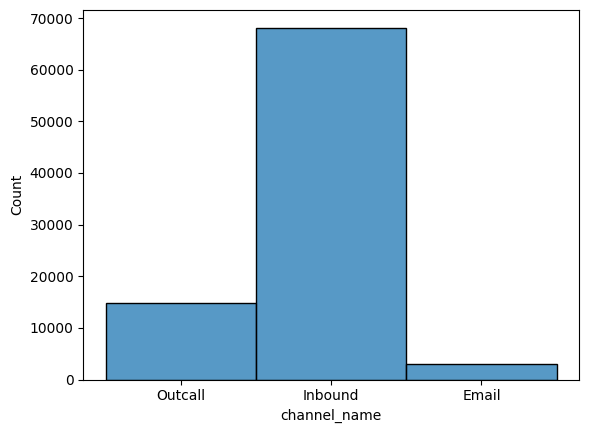

In [7]:
sns.histplot(data=CS_data, x="channel_name")

Это уже информацию можно вывести в табличном виде. Для подсчета количества объектов со всеми возможными вариантами значения по определенной колонке в pandas существует специальная функция:

In [8]:
CS_data.channel_name.value_counts() # Ранжируется в порядке убывания частот

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

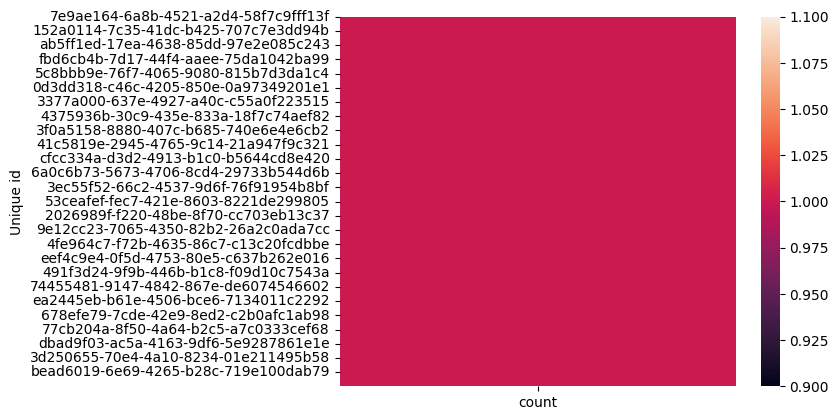

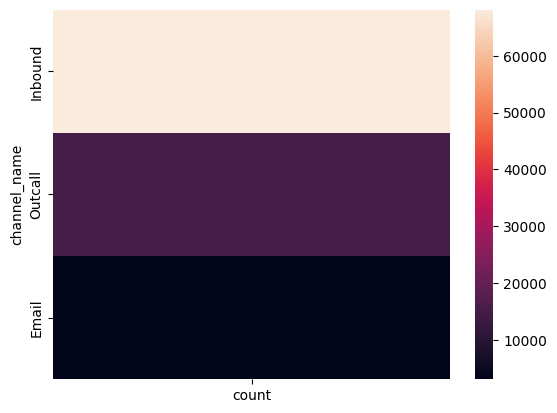

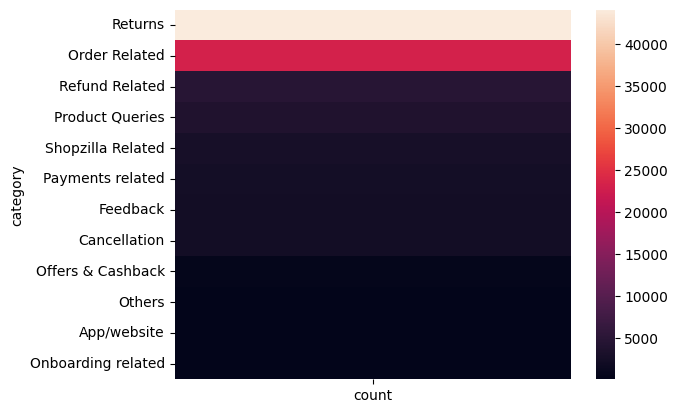

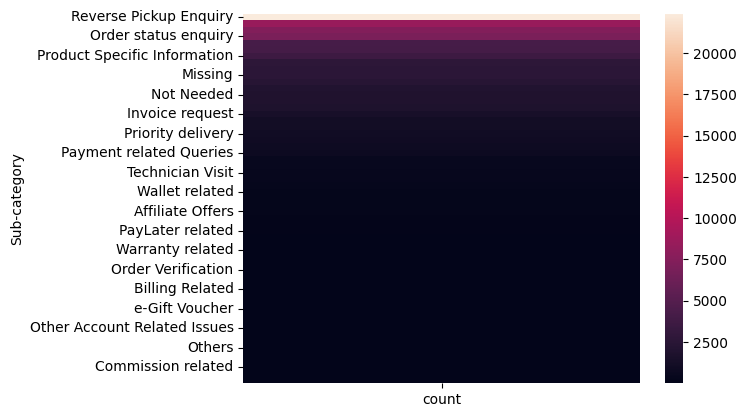

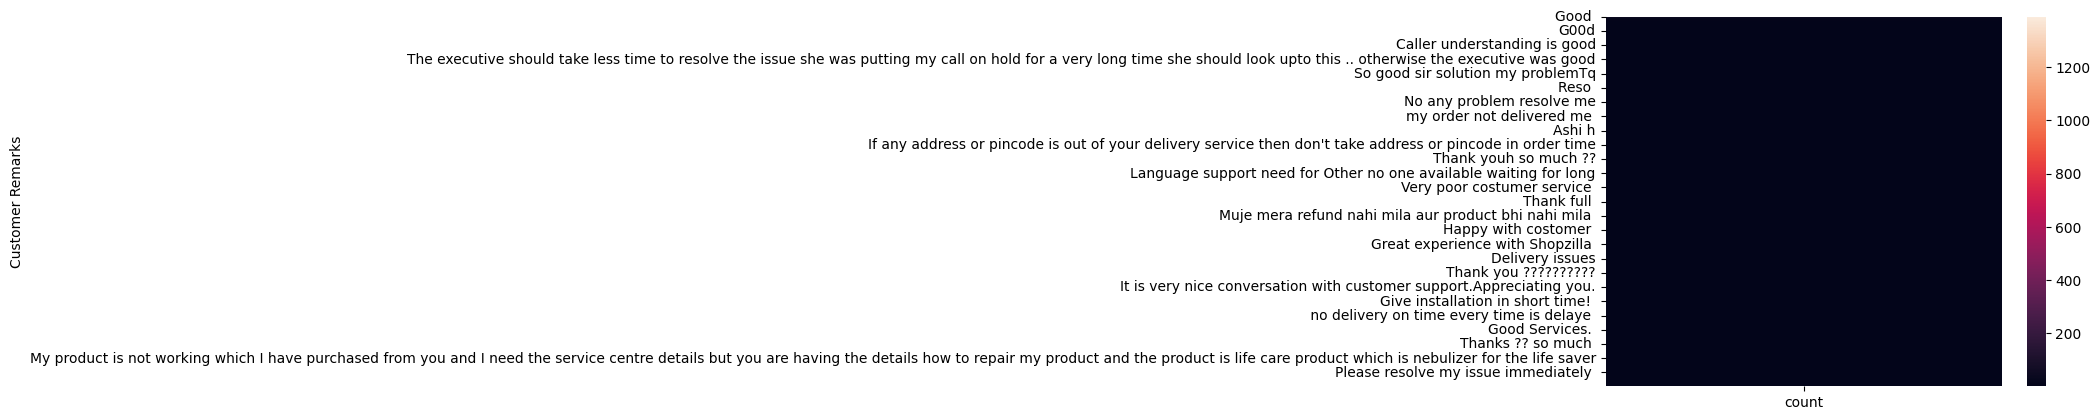

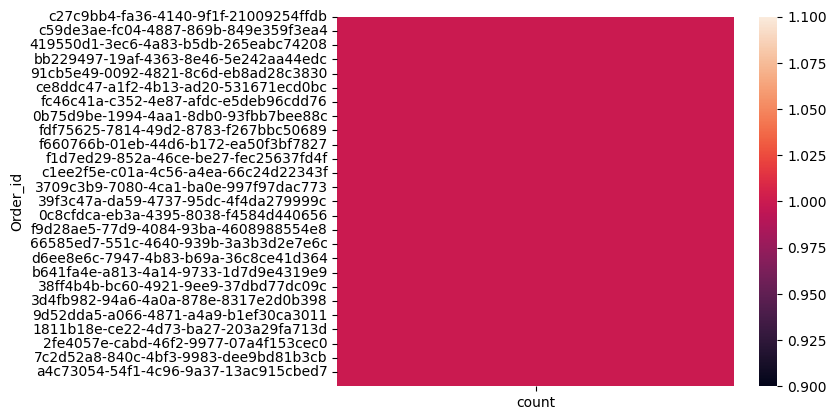

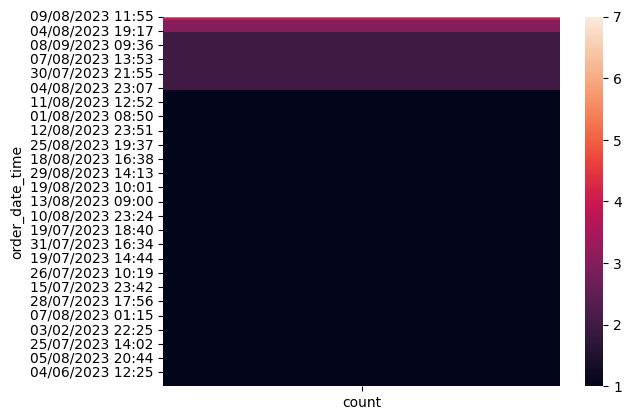

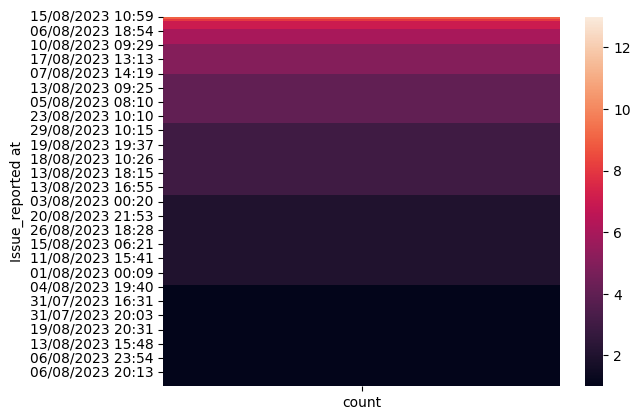

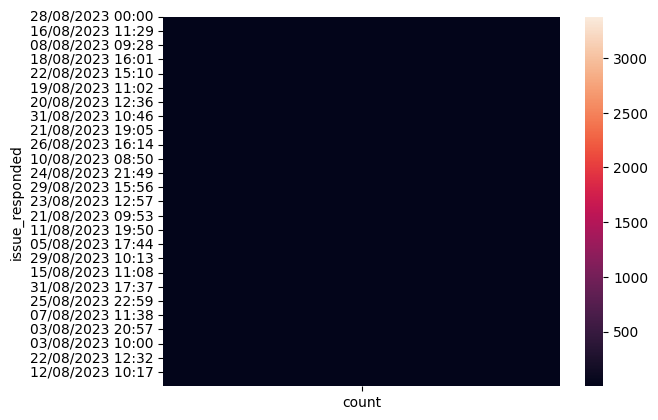

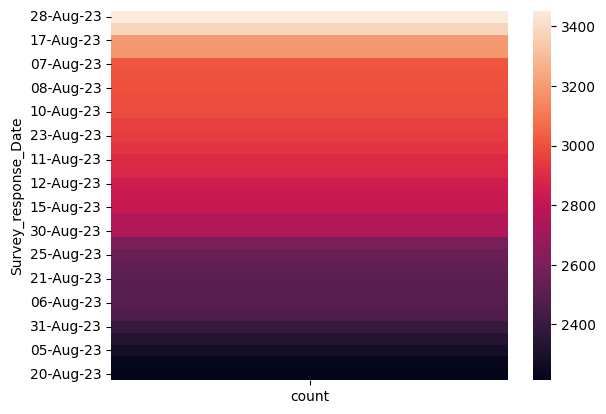

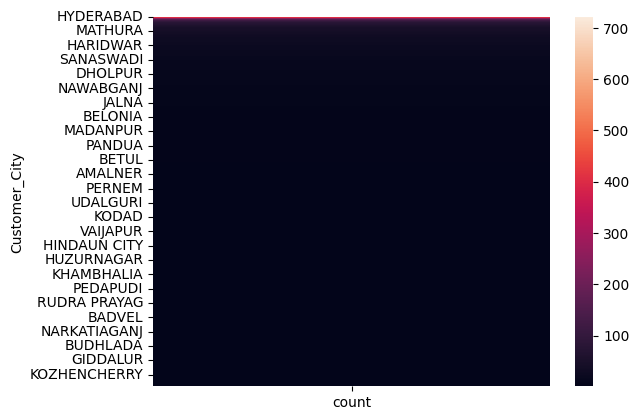

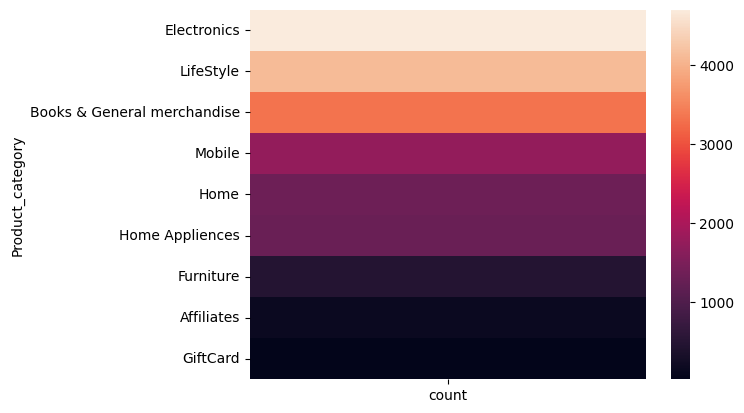

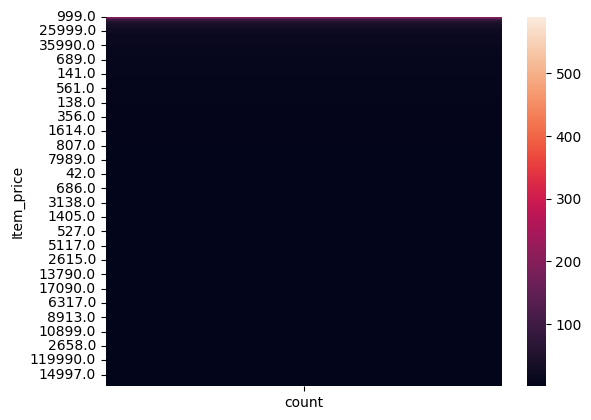

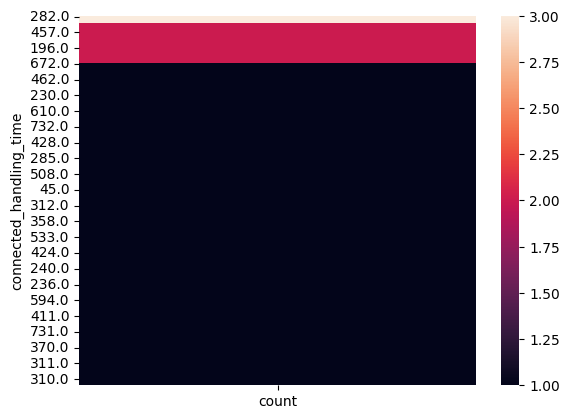

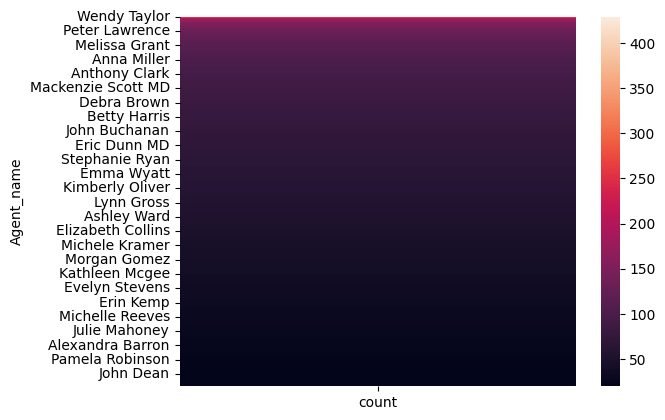

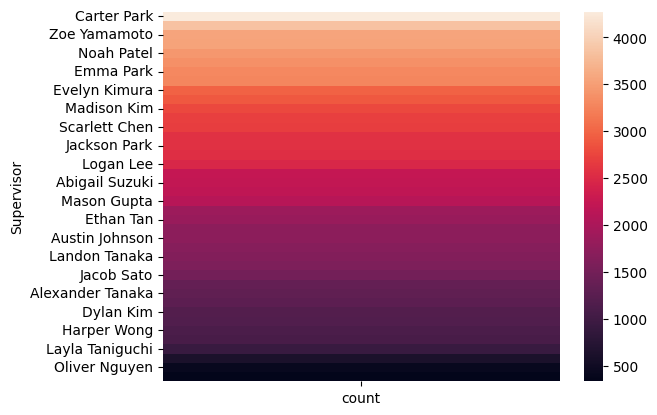

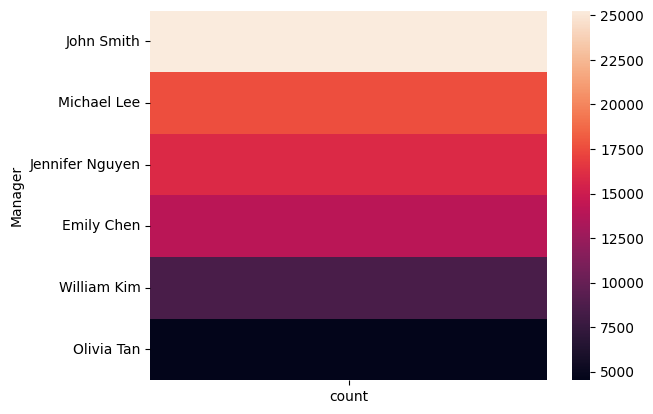

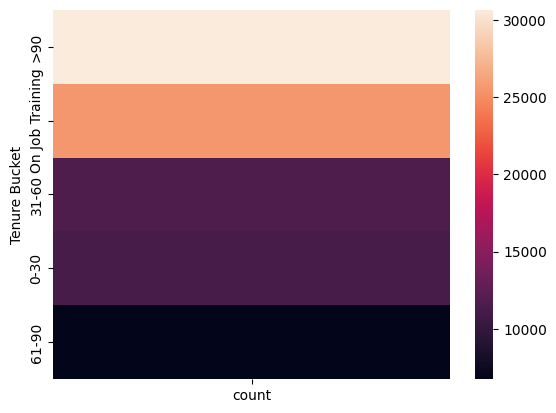

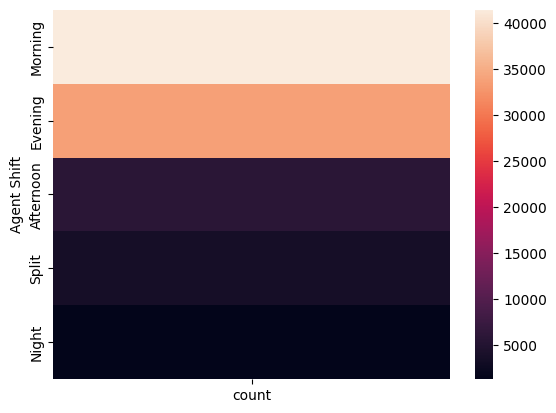

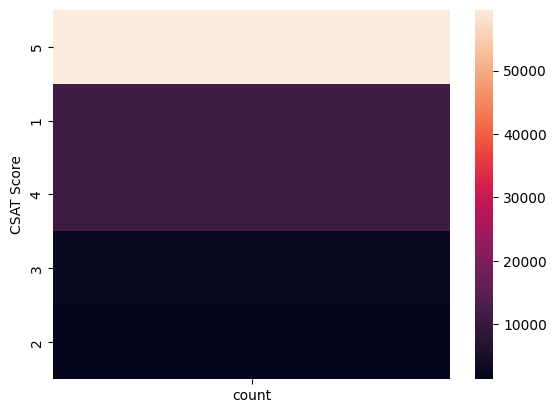

In [9]:
for name in CS_data.columns:
  sns.heatmap(CS_data[f'{name}'].value_counts().to_frame())
  plt.show()

Сразу же построим совместное распределение данного признака и целевой переменной. Так как признак категориальный, а целевая переменная - численная, мы можем построить на столбчатой диаграмме среднее значение целевой переменной для каждой категории:

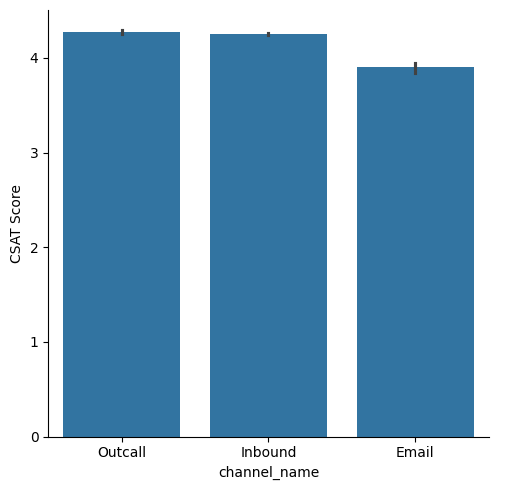

In [10]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

На графике видно, что средние значения для первый двух категорий отличаются несущественно, а по третьей - сильно ниже. Можно сделать вывод, что канал обращения влияет на потенциальную удовлетворенность клиента и обращения по электронной почте в среднем немного меньше нравятся клиентам

In [11]:
CS_data.category.value_counts()

category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64

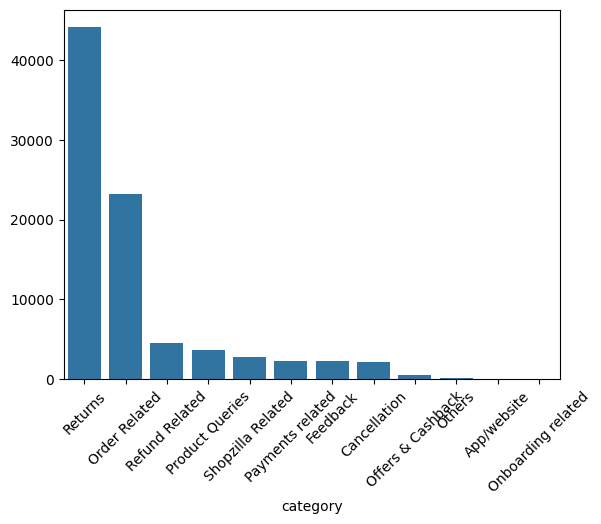

In [12]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

В данном случае, наблюдается типичный для таких распределений дисбаланс категорий. Присутствуют очень малочисленные категории. В таких случая стоит подумать над объединением категорий. Хотя представленный на графике случай еще далеко не самый экстремальный.

Теперь выведем среднее значение удовлетворенности в зависимости от значения данного признака:

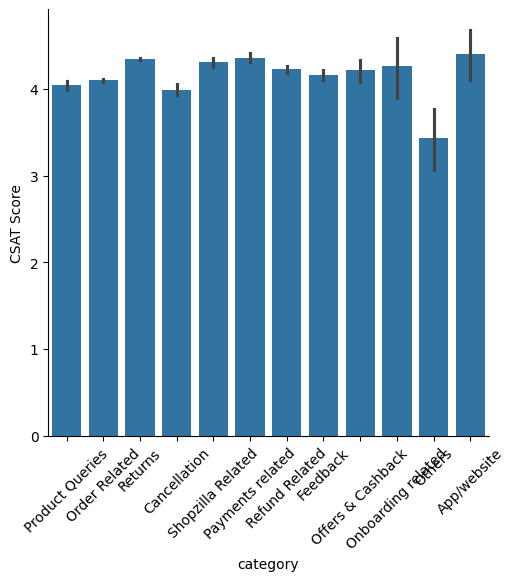

In [13]:
sns.catplot(data=CS_data, x="category", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

Но в целом, мы видим такое же характерное распределение - очень популярное значение и большое количество редких разных значений. Такие объемные распределения как раз более удобно анализировать в виде таблицы, так как можно вывести первые несколько строк:

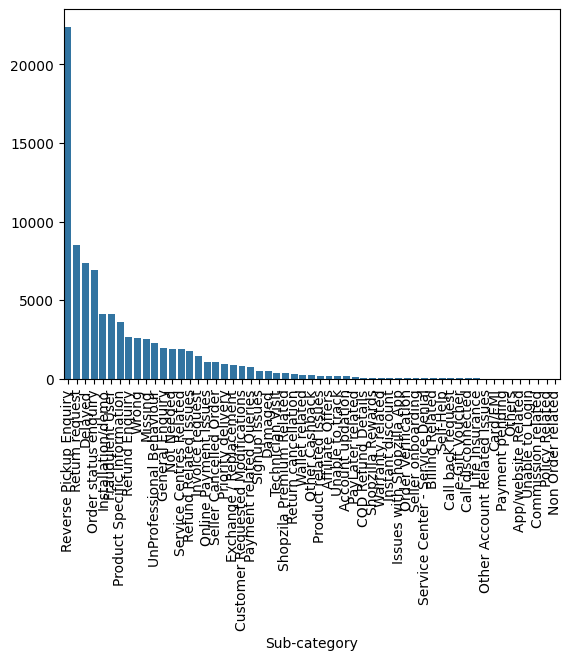

In [14]:
counts = CS_data['Sub-category'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

Визуализация совместного распределения с целевой переменной тоже выглядит довольно страшно:

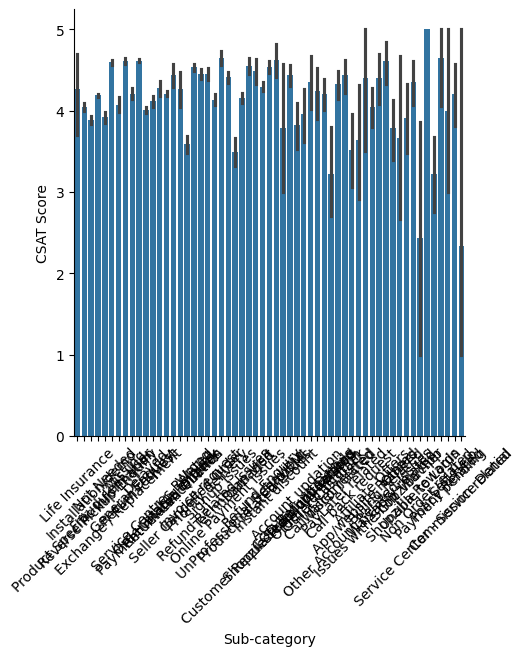

In [15]:
sns.catplot(data=CS_data, x="Sub-category", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

можно сделать вывод: чем менее популярное значение, там больше дисперсия (обозначенная на графике черной вертикальной линией) целевой переменной. Этого и следовало ожидать.

Теперь выведем информацию о столбце "Customer remarks". Так как это текст в свободной форме, и присутствует очень большое количество значений, нет смысла выводить гистограмму. Лучше как раз при помощи таблицы посмотреть несколько самых популярных значений:

In [16]:
CS_data['Customer Remarks'].value_counts()

Customer Remarks
Good                                    1390
Good                                    1158
Very good                                569
Nice                                     316
Thanks                                   276
                                        ... 
Happy bahat khusi hua                      1
My problem didn't solved                   1
Thanks to filpkard team                    1
Love you sir                               1
need to improve with proper details.       1
Name: count, Length: 18231, dtype: int64

Распределение по городам тоже выведем в виде таблицы:

In [17]:
CS_data['Customer_City'].value_counts()

Customer_City
HYDERABAD    722
NEW DELHI    688
PUNE         435
MUMBAI       406
BANGALORE    352
            ... 
GUNTAKAL       1
MANSAR         1
BAGHMARA       1
HINDORIA       1
DORAHA         1
Name: count, Length: 1782, dtype: int64

Но чтобы хоть как-то понять общую форму распределения, все-таки изобразим гистограмму:

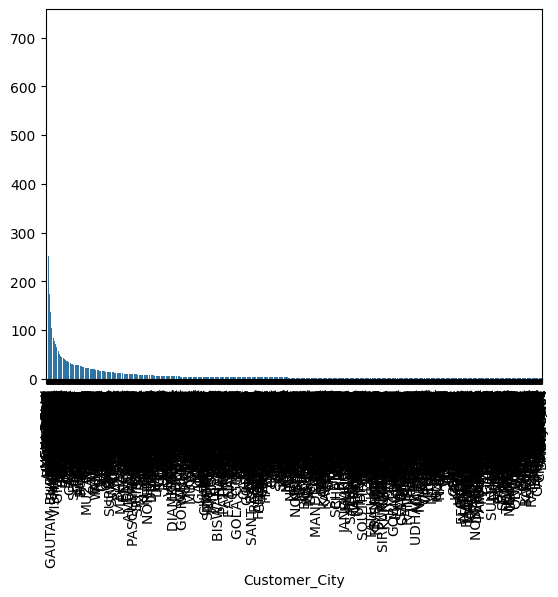

In [18]:
counts = CS_data['Customer_City'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

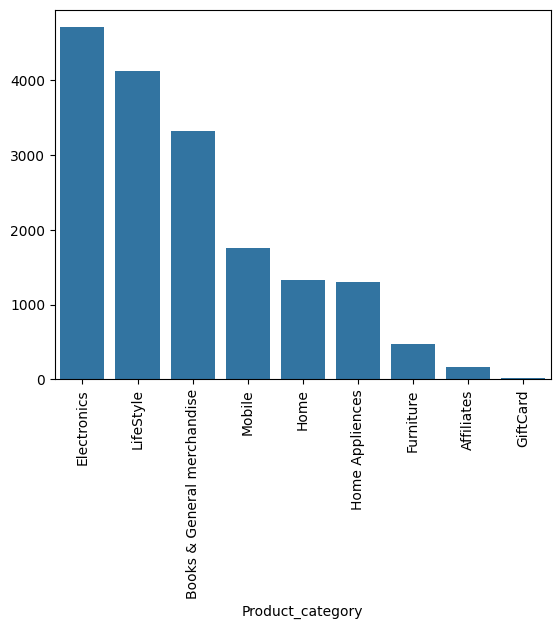

In [19]:
counts = CS_data['Product_category'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

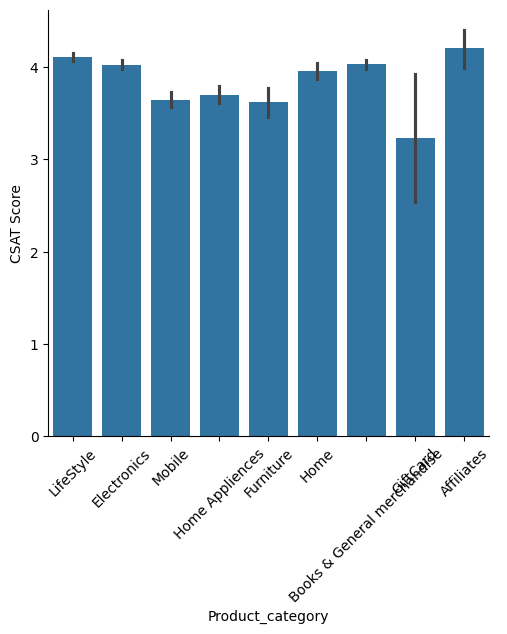

In [20]:
sns.catplot(data=CS_data, x="Product_category", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

In [21]:
CS_data['Agent_name'].value_counts()

Agent_name
Wendy Taylor         429
Timothy Huff         265
David Smith          264
Jamie Smith          253
Kayla Wilson         216
                    ... 
Amy Bell              20
John Torres           20
Stephanie Hammond     20
Summer Mitchell       20
Virginia Collins      20
Name: count, Length: 1371, dtype: int64

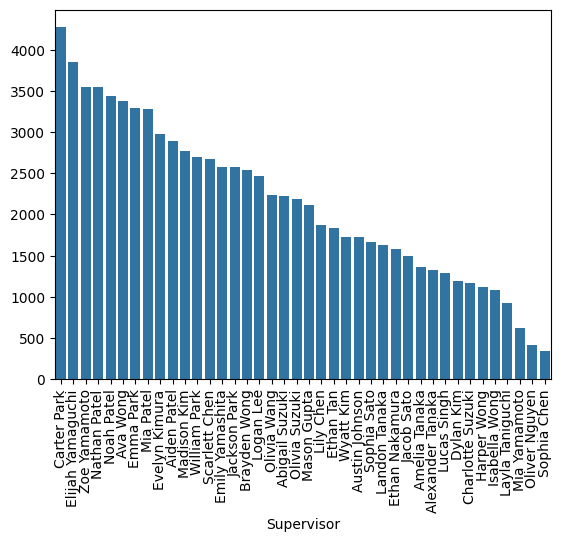

In [22]:
counts = CS_data['Supervisor'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

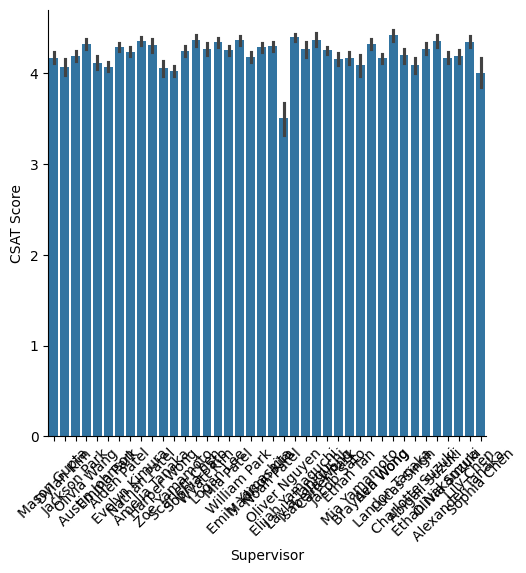

In [23]:
sns.catplot(data=CS_data, x="Supervisor", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

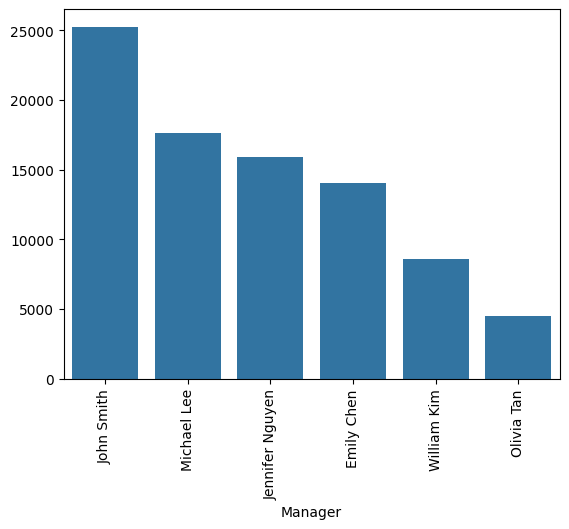

In [24]:
counts = CS_data['Manager'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

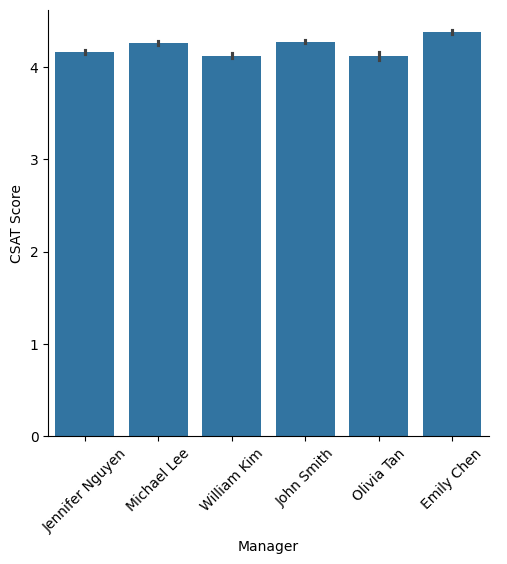

In [25]:
sns.catplot(data=CS_data, x="Manager", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

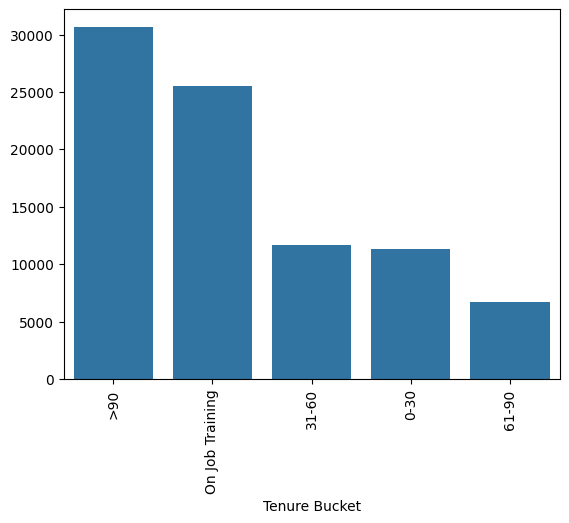

In [26]:
counts = CS_data['Tenure Bucket'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

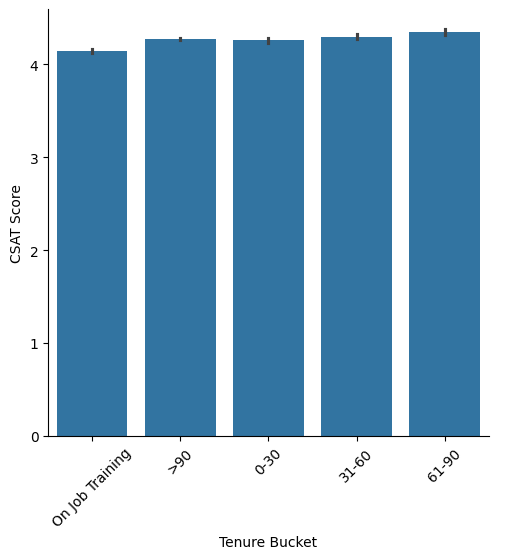

In [27]:
sns.catplot(data=CS_data, x="Tenure Bucket", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

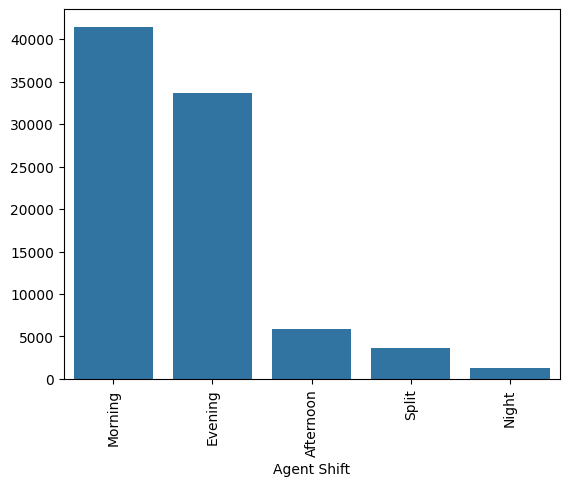

In [28]:
counts = CS_data['Agent Shift'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

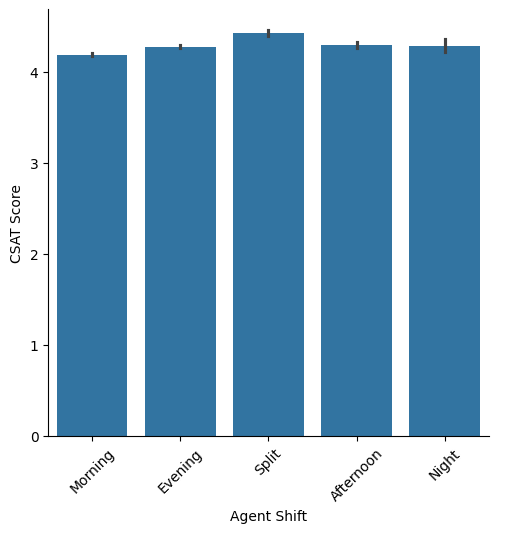

In [29]:
sns.catplot(data=CS_data, x="Agent Shift", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

####Укрупнение категорий

При преобразовании категориальных данных основной проблемой зачастую является то, что при кодировании атрибута с большим количеством значений по методу One-Hot в результате может получиться слишком много столбцов, что вредно как для потенциального переобучения модели, так и не очень эффективно с плане вычислительных ресурсов.

Поэтому при возможности можно постараться укрупнить категории, то есть объединить близкие по смыслу значения атрибута. Посмотрим, например, на отзывы клиента. При анализе мы уже пришли к выводу, что если отзыв присутствует, то он скорее всего положительный. Поэтому можно бинаризировать этот атрибут - если отзыв есть, ставим 1, если нет - 0:

In [30]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

В данном случае мы проверяем длину строки, чтобы отсечь пустые отзывы, часть их которых обозначена в данных как "NAN". При желании можно совершить более подробную обработку данных. И как всегда советуем создавать новые столбцы:

In [31]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int) #Бинаризация наличие заказов

А вот с другими категориальными переменным так просто уже не поступишь. Например, подкатегория обращения. Здесь мы видим большое количество малопопулярных значений. Часто в такой ситуации можно объединить редкие значения в одно, "Иное". Можно сделать это, например, так:

In [32]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

Здесь мы явно перечисляем самые популярные категории. Но можно сделать и автоматическое переименование, например, по порогу количества значений. Можете поэкспериментировать с этим самостоятельно. А мы пока заметим, что новое значение стало вторым по популярности в столбце:

Объединение редких значений - отличный способ радикально сократить количество столбцов в датасете после кодирования номинальных признаков. Однако, нужно проверять эффективность данного приема на метриках, и выбирать такое объединение, которое как можно меньше вредит эффективности модели. Как правило, чем больше значений мы объединяем, тем больше потери информации и потенциальное снижение качества модели.

####Добавление агрегированной информации

При работе с категориальными переменными с большим количеством значений часто бывает полезно рассмотреть добавление агрегированной информации к данным вместо самой категориальной переменной. Например, можно вместо имени оператора технической поддержки добавить колонку, отражающую загруженность данного оператора. Вполне логично выдвинуть гипотезу о том, что загруженность оператора влияет на качество его работы и, как следствие, на удовлетворенность клиентов.

Можно вывести информацию о количестве записей в колонке, сгруппированных по имени оператора:

In [33]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


Это информация нам нужна для проверки предположения о том, что у операторов существенно различается загрузка.

А для того, чтобы добавить колонку с количеством клиентов у соответствующего операторам можно вот так скомбинировать несколько функций pandas:

In [34]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count') #Получаем новый численный признак

Точно так же можно поступить и с количеством операторов у одного руководителя. Но теперь нам понадобится другая агрегирующая функция, так как значения имени оператора могут повторяться:

In [35]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


In [36]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique') # Добавляем с датасету

В каждой задаче нужно оценивать необходимость использования агрегированной информации исходя из смысла атрибутов и предметной области. Но в целом это хороший источник новых данных и признаков, не увеличивающий кратно объемов датасетов.

####Заполнение отсутствующих значений

В отличие от численных атрибутов, заполнение пропусков в категориальных переменных значительно проще. В большинстве случаев наиболее адекватным будет заполнение неизвестных значений специальным:


В данном примере еще требуется заполнить пропуски в численном поле. Просто проиллюстрируем, что в особых случаях, численные переменные тоже можно заполнять специальными значениями:

In [37]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

Хотя, в некоторых случаях, применяют и заполнение модой, то есть самым распространенным значением. Эффективность конкретных способов нужно оценивать исходя из их влияния на метрики эффективности моделей.

В данном примере еще требуется заполнить пропуски в численном поле. Просто проиллюстрируем, что в особых случаях, численные переменные тоже можно заполнять специальными значениями:

In [38]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna(0)

Конечно это работает только в тех случаях, когда имеет предметный смысл.

####Преобразование бинарных атрибутов

Для иллюстрации методов преобразования категориальных переменных в численные нам больше подойдет второй датасет, прилагающийся к данной работе - Титаник. Подробное описание этого уже хорошо известного нам набора мы опустим. Важно, что он содержит категориальные переменные всех интересующих нас типов шкал.

Начнем с самого простого типа категориальных атрибутов - бинарных. Их можно преобразовывать как угодно. Самый компактный способ - LabelEncoder.

Этот способ кодирования просто заменяет значения атрибута на последовательные целые числа. В данном случае, 0 или 1 в произвольном порядке:

In [39]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

####Преобразование порядковых атрибутов

Порядковые атрибуты, то есть такие, значения которых можно сравнивать друг с другом, чаще всего приходится заменять с помощью вручную составленного словаря, чтобы соблюсти естественный порядок значений. Рассмотрим, например, класс обслуживания на Титанике. Его можно закодировать так:

In [40]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

####Преобразование номинальных атрибутов

Номинальные атрибуты, к которым относится большинство категориальных, можно преобразовывать только с использованием OneHotEncoder. Этот способ кодирования следует выбирать в случае сомнений в типе шкалы атрибута. Продемонстрируем работу этого кодировщика:

In [41]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

Как мы видим, интерфейс его работы схож с другимм классами для преобразования данных библиотеки sklearn.

Для формирования таблицы с преобразованными данными нам понадобится сформировать список названий колонок:

In [42]:
OH_embarked.get_feature_names_out(['Embarked'])

dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)

На жаном примере достаточно очевидна схема работы этого кодировщика. Они преобразует одну колонку с множеством значений в множество колонок с бинарными значениями.

В этом виде они готовы к объединению с исходным датафреймом:

In [43]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

####Удаление лишних столбцов и массовое преобразование

Для финализации процедуры подготовки категориальных данных вернемся к первому датасету. На примере Титаника мы познакомились с подробным алгоритмом работы кодировщика OneHotEncoder. Из-за его универсальности, его часто применяют массово, на всех категориальных атрибутах, независимо от типа. Именно для этого в pandas и существует функция get_dummies().

Но перед ее применением необходимо сначала удалить из датасета все ненужные колонки, особенно категориальные. После преобразования это будет сделать уже не так просто. Мы сейчас удалим все лишние атрибуты произвольно. На практике для этого можно использовать анализ значимости атрибутов.

In [44]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

Перед массовым преобразованием рекомендуем вывести основную статистику по категориальным колонкам еще раз, чтобы убедиться, что в датасете не осталось атрибутов с большим количеством значений (describe, info).

Теперь одной инструкцией можно массово преобразовать все категориальные атрибуты в бинарные признаки по методу OneHotEncoder.

После этого преобразования количество столбцов в датасете может произвольно увеличиться. В данном случае мы проконтролировали этот процесс, но все равно получили в несколько раз больше колонок, чем было:

In [45]:
CS_dummies = pd.get_dummies(CS_dropped)

В реальности увеличение объема данных может быть еще более значительным. Если это нежелательно, нужно работать с категориальными переменными до преобразования, как мы показали в этой работе.

#Самостоятельные задания

##### 1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

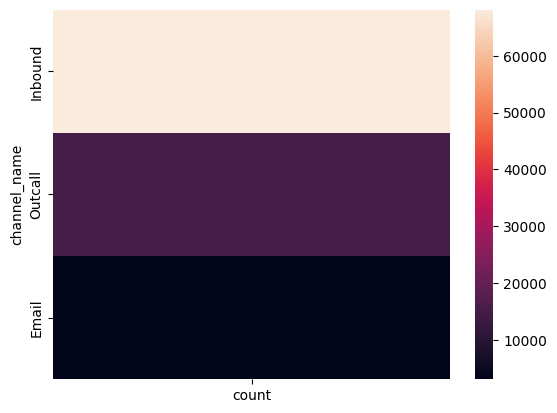

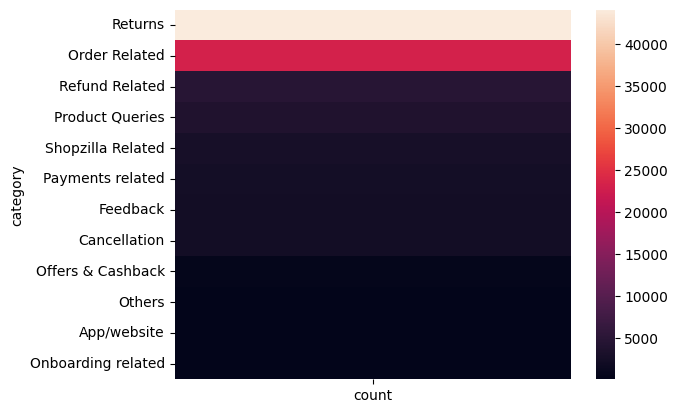

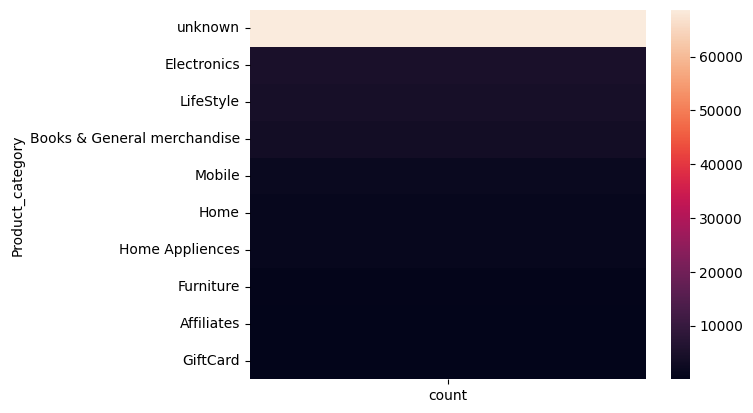

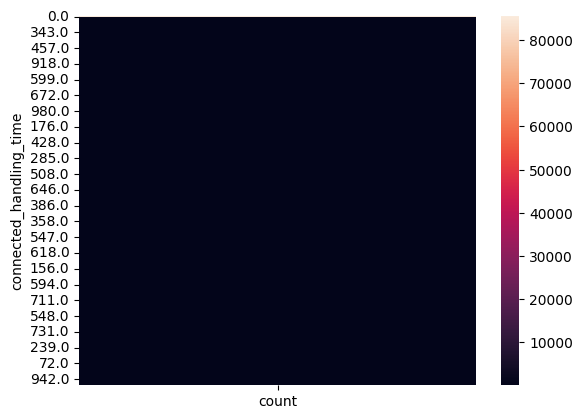

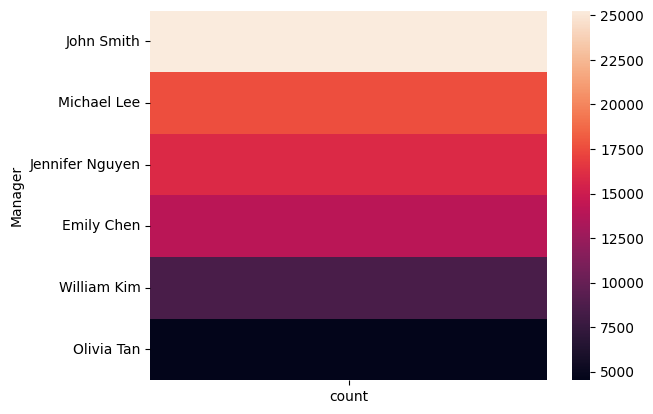

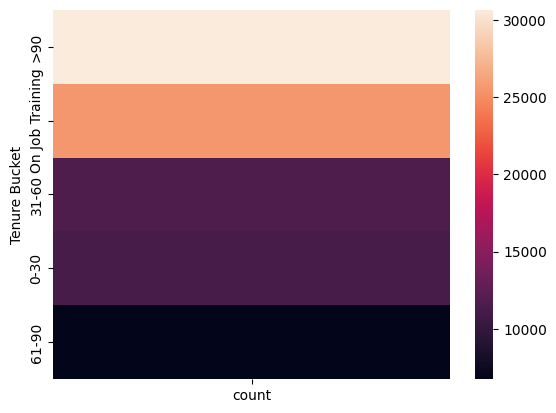

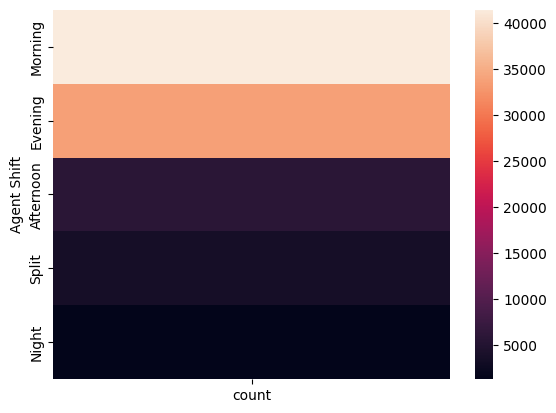

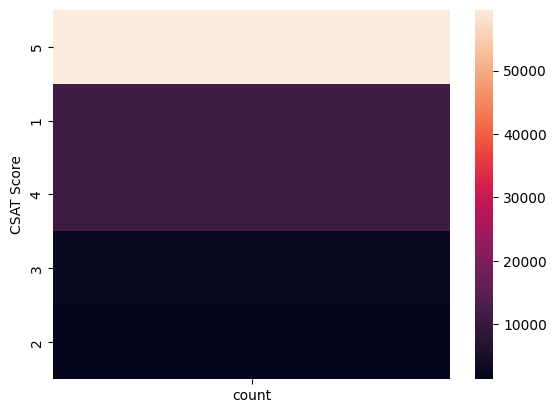

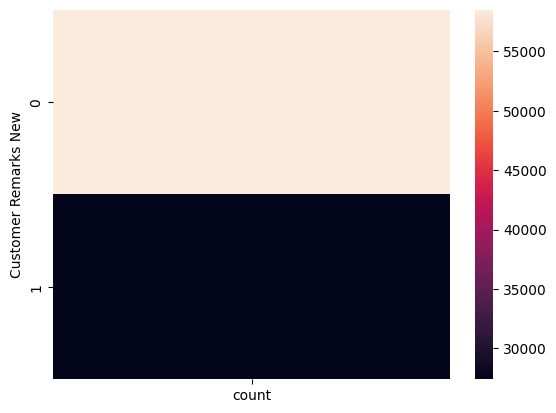

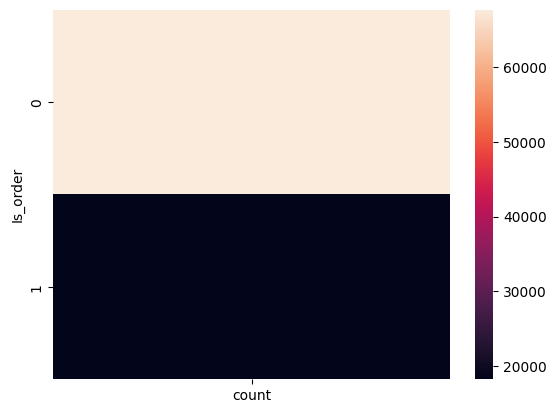

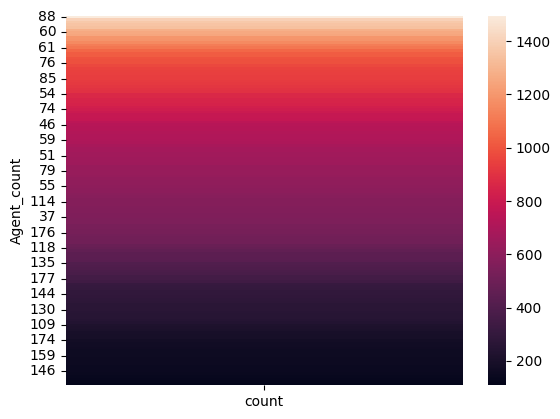

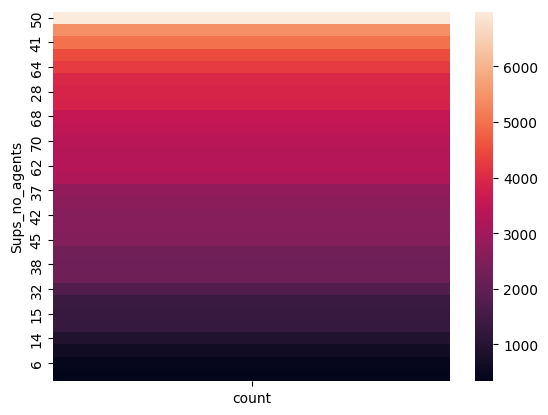

In [62]:
for name in CS_dropped.columns:
  sns.heatmap(CS_dropped[f'{name}'].value_counts().to_frame())
  plt.show()

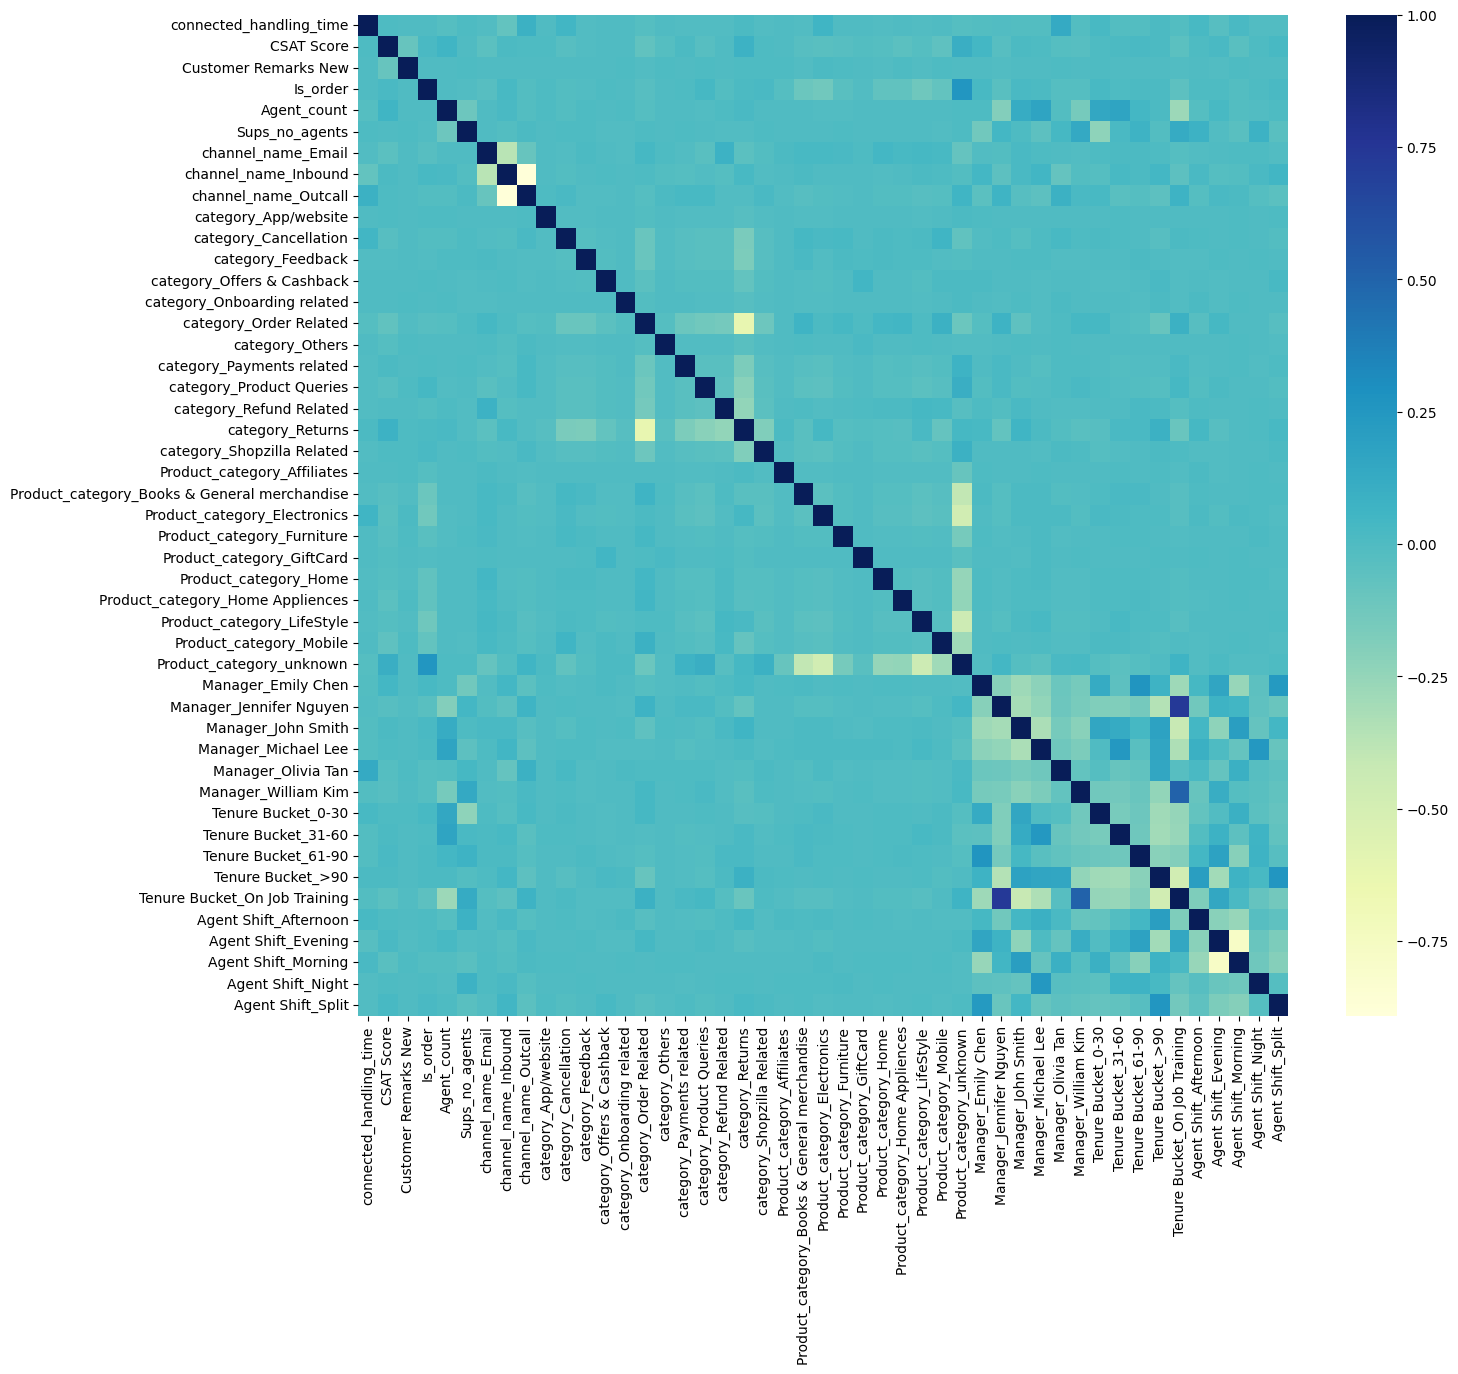

In [55]:
CS_corr = CS_dummies.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(CS_corr, cmap="YlGnBu")
plt.show()

#### 2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
CS_dummies.describe(include='all')

,connected_handling_time,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
count,85907.000000,85907.000000,85907.000000,85907.000000,85907.000000,85907.000000,85907,85907,85907,85907,...,85907,85907,85907,85907,85907,85907,85907,85907,85907,85907
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,82884,68142,71165,85823,...,74589,74242,79166,55247,60384,80067,52230,44481,84591,82259
mean,1.302583,4.242157,0.319008,0.212230,82.733433,41.358690,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27.763363,1.378903,0.466095,0.408889,47.494745,15.862947,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,0.000000,0.000000,20.000000,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,4.000000,0.000000,0.000000,53.000000,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,5.000000,0.000000,0.000000,75.000000,41.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,5.000000,1.000000,0.000000,102.000000,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
y = CS_dummies['CSAT Score']
X = CS_dummies.drop('CSAT Score', axis=1)

In [50]:
X_CS_train, X_CS_test, y_CS_train, y_CS_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model_Dtree = DecisionTreeClassifier().fit(X_CS_train, y_CS_train)

y_CS_pred = model_Dtree.predict(X_CS_test)

0.5631474799208473


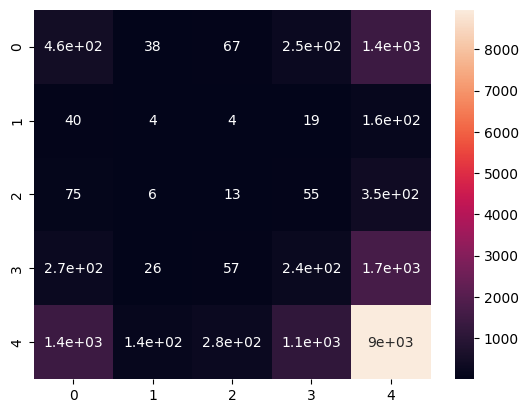

In [52]:
sns.heatmap(confusion_matrix(y_CS_test, y_CS_pred), annot=True)
print(accuracy_score(y_CS_test, y_CS_pred))

Text(0.5, 1.0, 'Важность признаков')

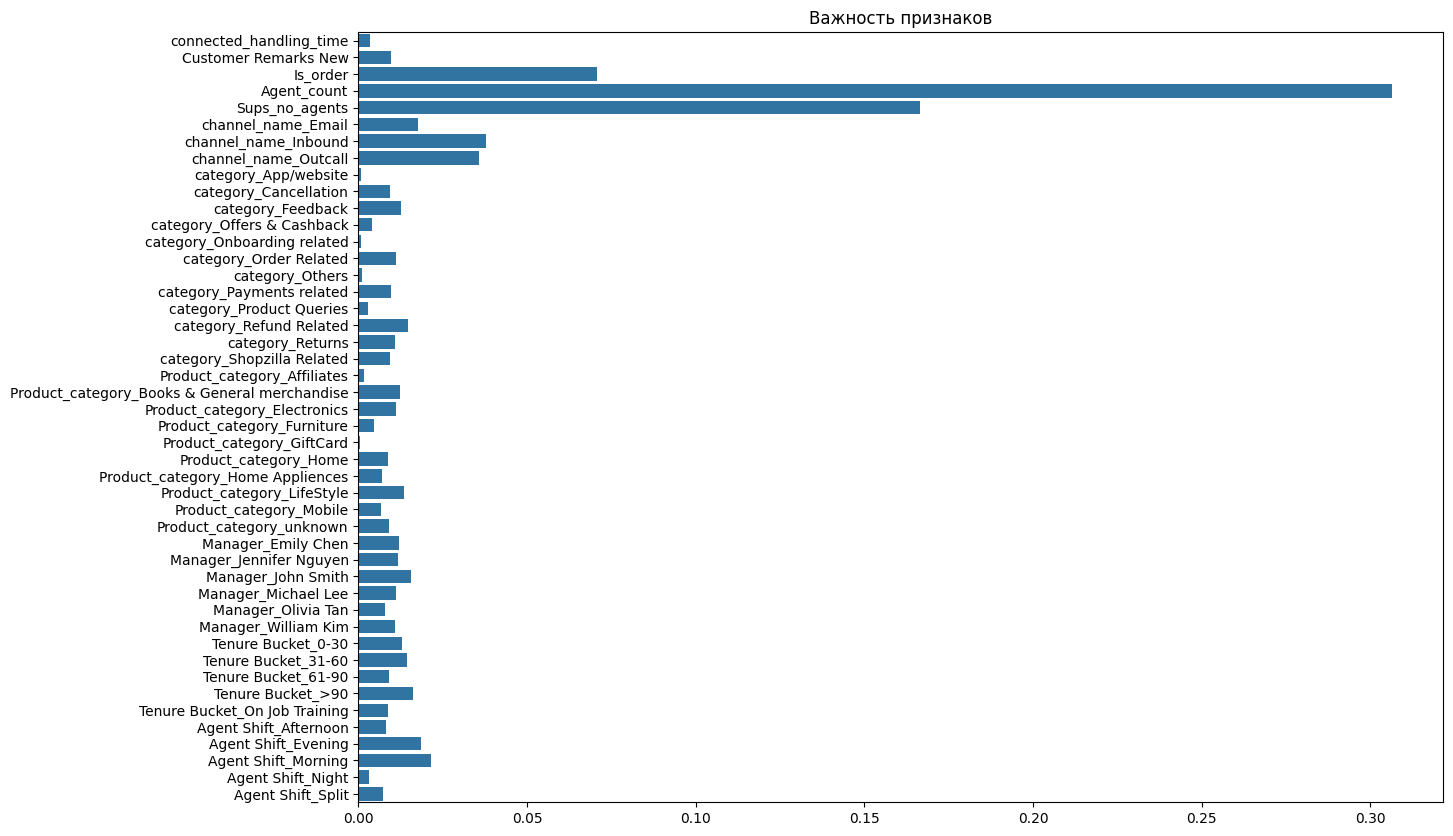

In [61]:
f = plt.figure(figsize=(14, 10))
sns.barplot(x=model_Dtree.feature_importances_, y=model_Dtree.feature_names_in_)
plt.title('Важность признаков')

#### 3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

#### 4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

In [61]:
Tit_data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/titanic.csv')
Tit_data.describe(include='all')

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,third,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,445.000000,446.000000,0.383838,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,257.353842,0.486592,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,222.500000,223.500000,0.000000,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,445.000000,446.000000,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,667.500000,668.500000,1.000000,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [62]:
Tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


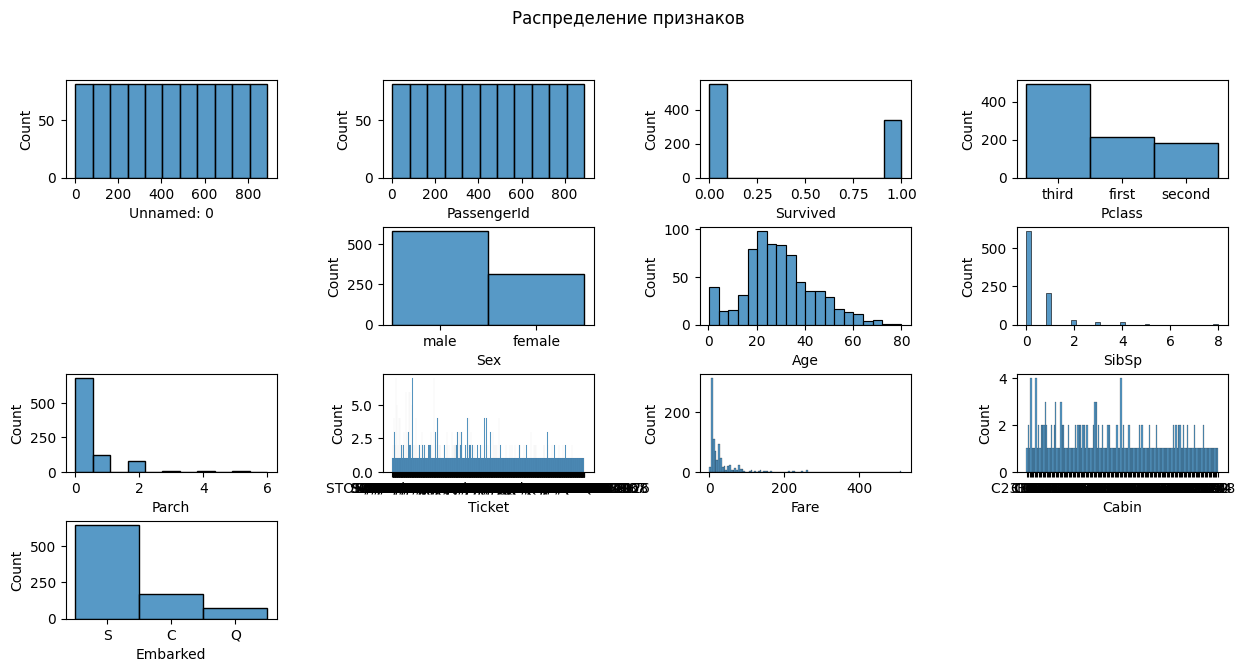

In [71]:
f = plt.figure(figsize=(15, 7))
for i, name in enumerate(Tit_data):
  if name in ['Name']:
    continue
  plt.subplot(4, 4, i+1)
  sns.histplot(data=Tit_data, x=f'{name}')
f.suptitle('Распределение признаков')
f.subplots_adjust(hspace=0.5, wspace=0.5)

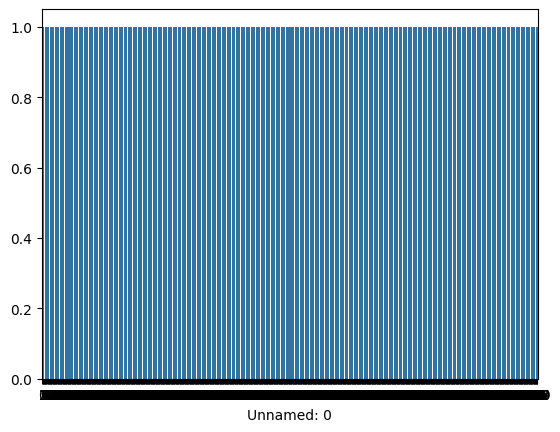

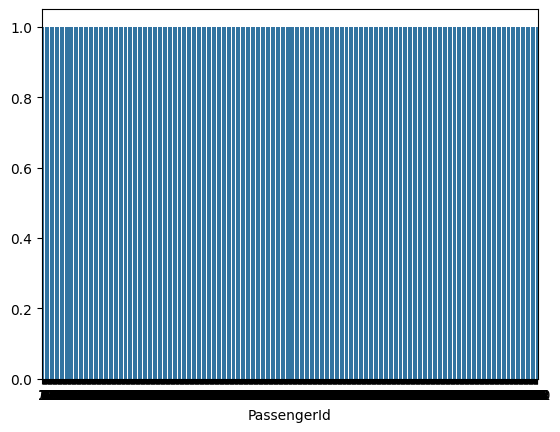

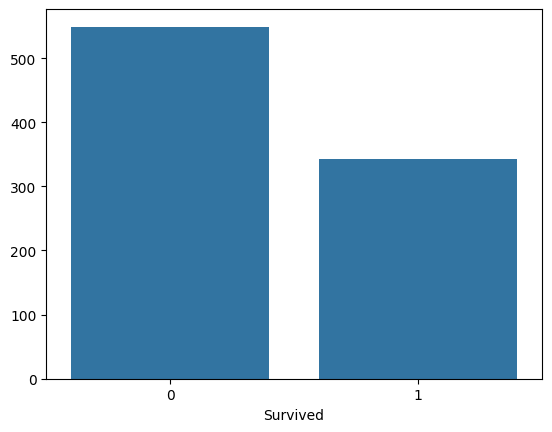

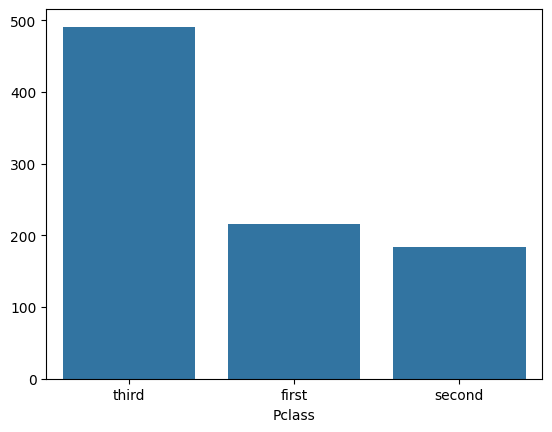

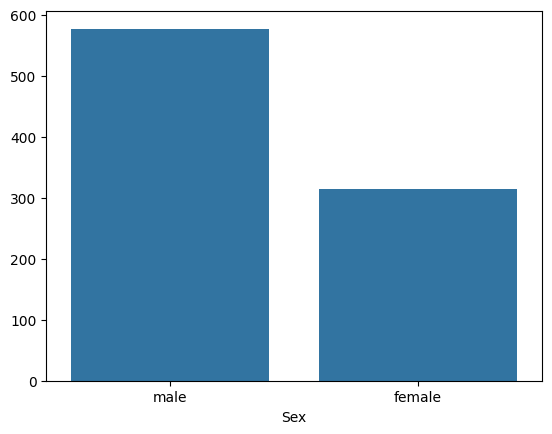

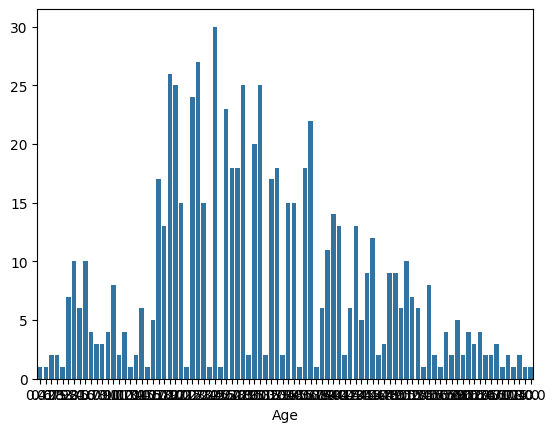

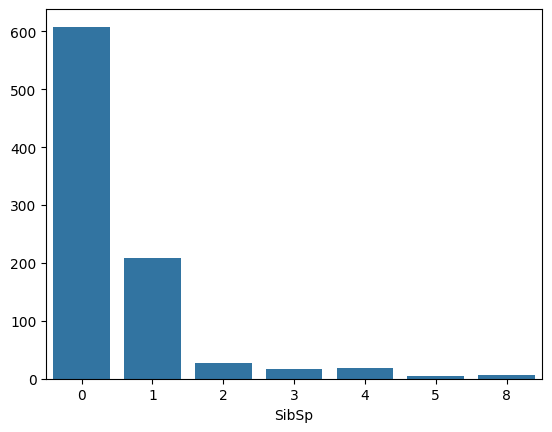

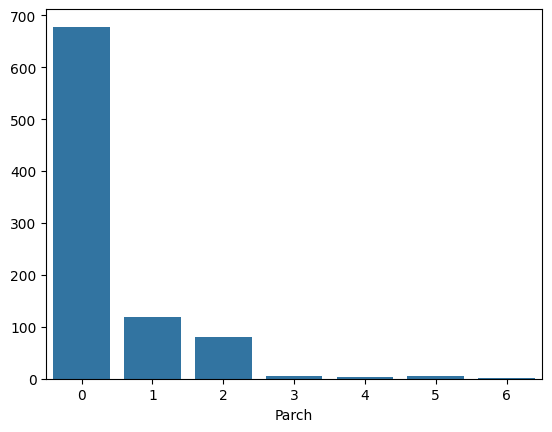

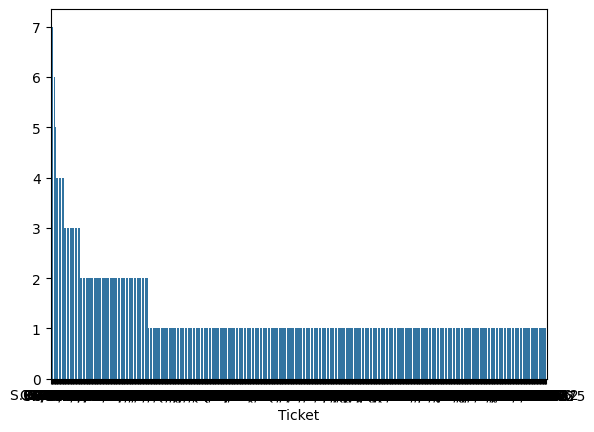

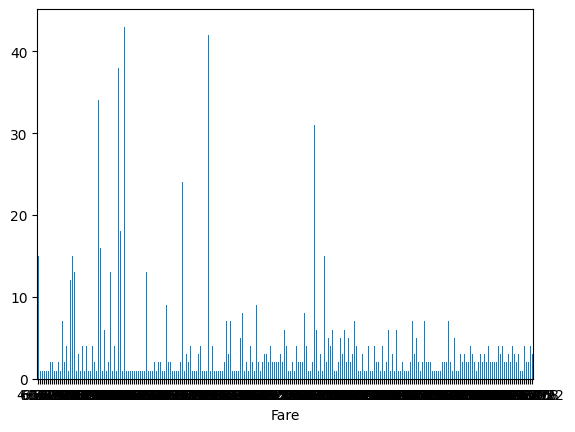

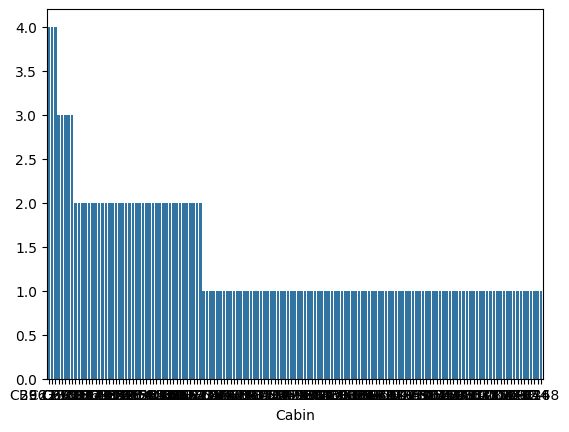

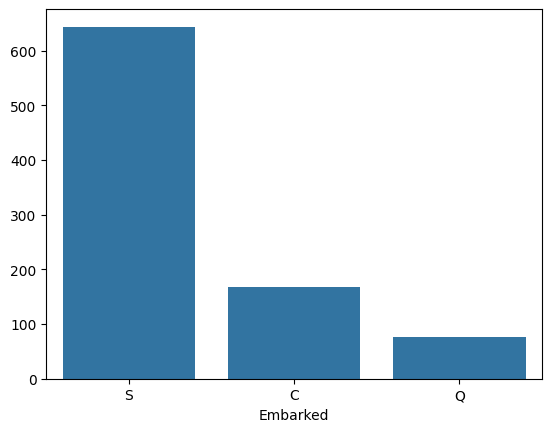

In [74]:
for i, name in enumerate(Tit_data):
  if name in ['Name', 'Unnamed: 0', 'PassengerId']:
    continue
  counts = Tit_data[f'{name}'].value_counts()
  sns.barplot(x=counts.index, y=counts.values)
  plt.show()

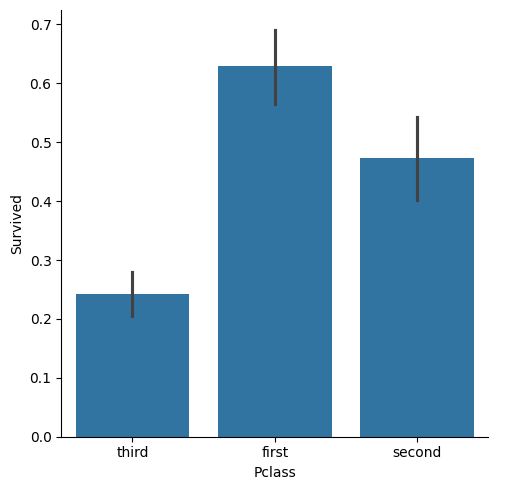

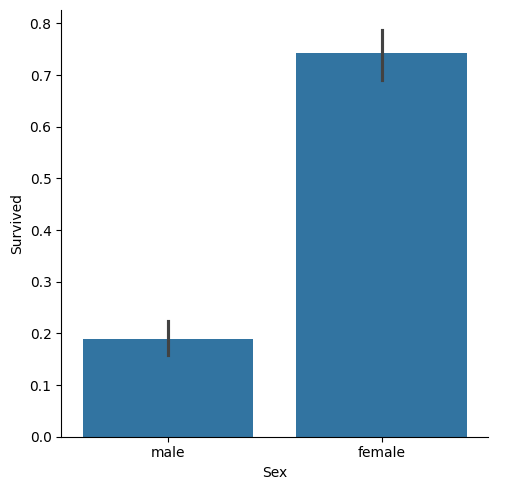

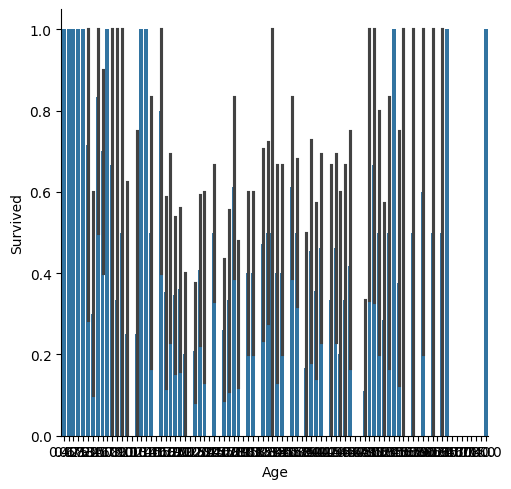

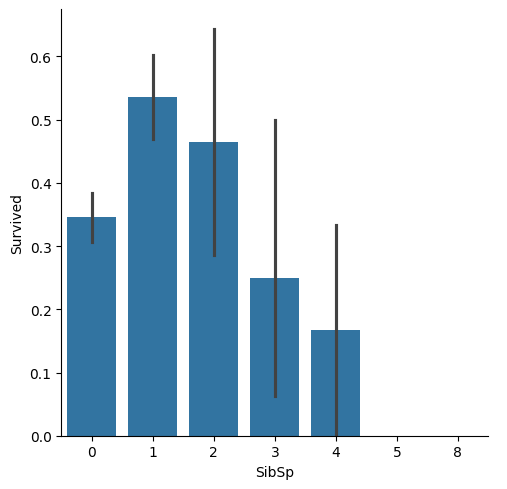

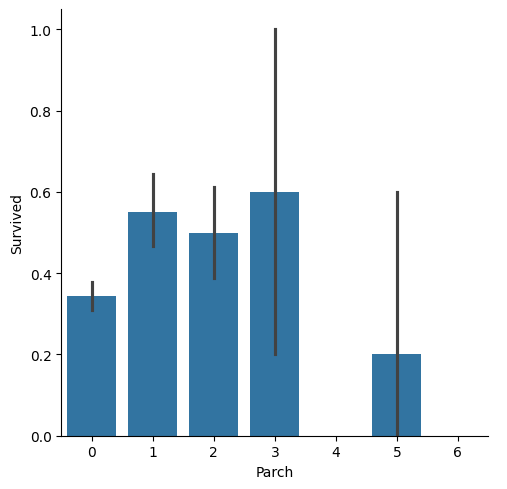

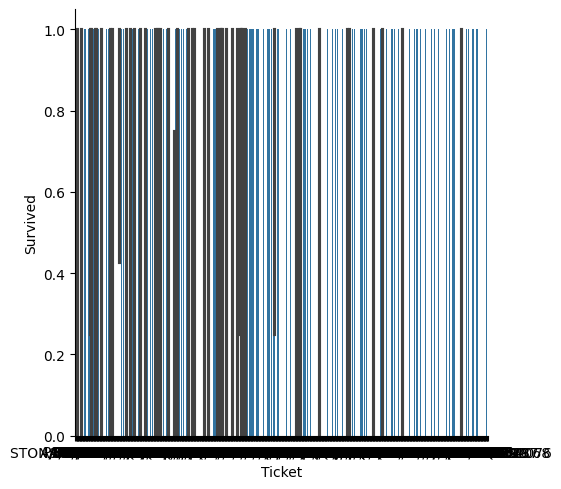

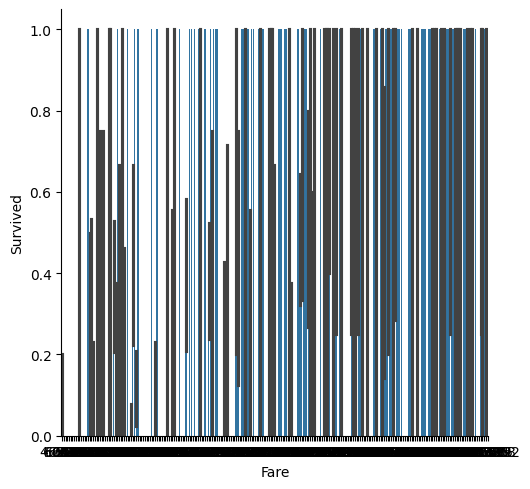

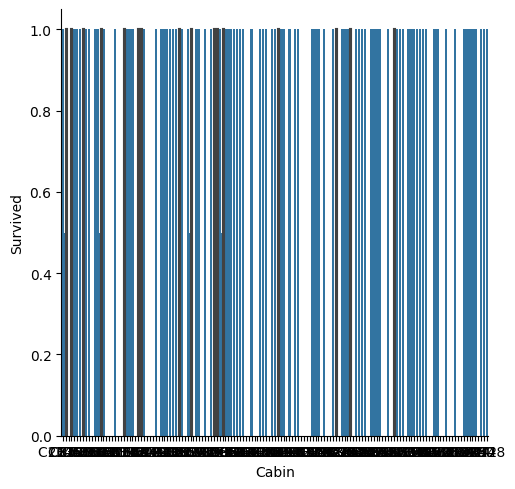

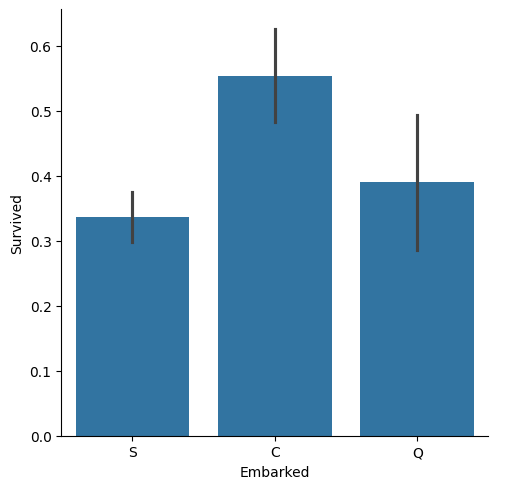

In [76]:
for i, name in enumerate(Tit_data):
  if name in ['Name', 'Unnamed: 0', 'PassengerId', 'Survived']:
    continue
  sns.catplot(data=Tit_data, x=f'{name}', y='Survived', kind='bar')
  plt.show()


#### 5. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес). Поэкспериментируйте с различными вариантами преобразований.

#### 6. Создайте воспроизводимый код обработки данного датасета.